<a href="https://colab.research.google.com/github/momohirata/mooc_machine_learning/blob/master/mooc_machine_learning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 決定木
<img src="https://drive.google.com/uc?export=view&id=1aVmLXIelhipqMve0hPOTxHCtXsoMf204" width="400">

「炎上する」「炎上しない」を分けるような特徴を探していくことが学習

<img src="https://drive.google.com/uc?export=view&id=175WRW9YfGepJd_67E1QZU3_pNFd7k6Gh" width="400">

3種類アイリスがあって、3種類が同確率で出てくるとき → 不純度が高い
3種類アイリスがあって、1種類しか出てこないとき → 不純度が低い




In [10]:
# 決定木

# データを取得
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=27) # 不純度基準はjiniからdefault→entropy
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


1.0
0.8947368421052632


k-NNよりは精度が悪いけど、まあまあ良い
決定木は人が見てわかりやすいのが良いところ

### 決定木の枝刈り
決定木は深くなるほど複雑さが増す → 深くなるのを止めてシンプルを保つ

### 事前枝刈り

In [11]:
# 事前枝刈り
model = DecisionTreeClassifier(max_depth=3, random_state=27)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
# シンプルにすることで、モデルに対する精度は下がったが、テストデータに対する精度はあがった

0.9821428571428571
0.9736842105263158


### アンサンブル学習
複数の学習器を作って、結果を混ぜて結論を出す

<img src="https://drive.google.com/uc?export=view&id=1L3sJ2YtF9TrHYIOiAsHhbBuvssEYvFP0" width="400">


1. ブートストラップでデータを3つにわける
2. ハイパーパラメーターを変えた3つの決定木をつくる
3. 3つを集約する

↓

これが**ランダムフォレスト**


決定木はBiasが小さくてValianceが大きい

つまり

真の表現には近いけど、ばらつきが大きい

だから

たくさん作っておけば、いい感じにばらつきが収まるのでは？という考え方

### サポートベクターマシーン

<img src="https://drive.google.com/uc?export=view&id=1Yk5MxaSgZ8hjivLi-LL8cUbtY_E7Om7n" width="400">

<img src="https://drive.google.com/uc?export=view&id=1f23T5qrRdLFnSMBjPWgzIWyi3Fu-mIdk" width="400">

<img src="https://drive.google.com/uc?export=view&id=1OcVY0Kn_R0qcBqAQpIIvMpB6LScrGDqt" width="400">

<img src="https://drive.google.com/uc?export=view&id=1MK6-Mylc-tw5DejapTQ72OvvCoqryNE7" width="400">

<img src="https://drive.google.com/uc?export=view&id=11Cj8UbVZPMDVgGHOGPbchZjAXz46xUIV" width="400">

### ソフトマージン
無理に完全に分離するよりも、少しだけ外れ値を許容するほうが望ましいこともある
※ 未知のデータに対して適応しやすいモデルになるため




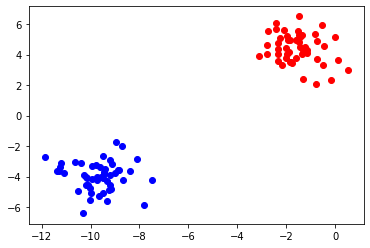

In [15]:
# データの作成
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=1)
plt.scatter(X[y==0,0], X[y==0,1], c='red')
plt.scatter(X[y==1,0], X[y==1,1], c='blue')
plt.show()

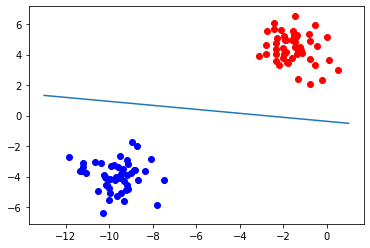

In [20]:
import numpy as np
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0).fit(X, y) #線形のSVC

# グラフに線を引きたい
coefs = model.coef_
intercepts = model.intercept_
plt.scatter(X[y==0,0], X[y==0,1], c='red')
plt.scatter(X[y==1,0], X[y==1,1], c='blue')
line_x = np.linspace(-13,1)
line_y = -(line_x*coefs[0][0] + intercepts[0])/coefs[0][1]
plt.plot(line_x, line_y)
plt.show()

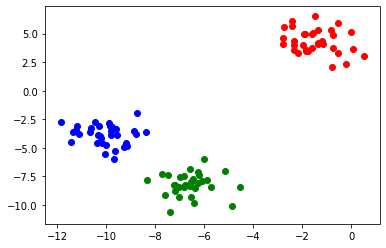

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


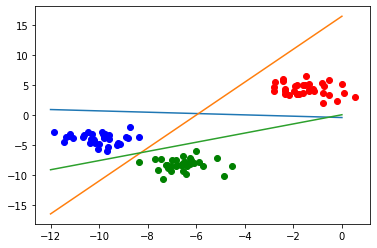

In [22]:
# 多クラス分類
# データ作成
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(centers=3, random_state=1)
plt.scatter(X[y==0,0], X[y==0,1], c='red')
plt.scatter(X[y==1,0], X[y==1,1], c='blue')
plt.scatter(X[y==2,0], X[y==2,1], c='green')
plt.show()

import numpy as np
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.0).fit(X, y) #線形のSVC

# グラフに線を引きたい
coefs = model.coef_
intercepts = model.intercept_

plt.scatter(X[y==0,0], X[y==0,1], c='red')
plt.scatter(X[y==1,0], X[y==1,1], c='blue')
plt.scatter(X[y==2,0], X[y==2,1], c='green')
line_x = np.linspace(-12,0)

for i in range(0,3):
    line_y = -(line_x*coefs[i][0] + intercepts[i])/coefs[i][1]
    plt.plot(line_x, line_y)

plt.show()

サポートベクターマシーンの良いところ
線形じゃないデータを線形に分類できるところ

<img src="https://drive.google.com/uc?export=view&id=1ouTegL-6bIBuyJ3Obm0-zyIdh4b7LOo4" width="400">

<img src="https://drive.google.com/uc?export=view&id=1CCsaWpnpdU7zhPK9KnHfUU_nc26rfprf" width="400">

方法がカーネルトリック(割愛)

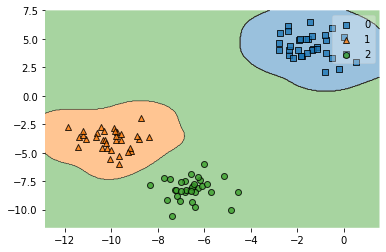

In [24]:
# RBFカーネルを使ってみる
%matplotlib inline
from sklearn import datasets
from sklearn import svm
from mlxtend.plotting import  plot_decision_regions
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(centers=3, random_state=1)
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
#c:どれだけ間違って良いか(ソフトマージン) gamma:パラメータ
model.fit(X,y)

plot_decision_regions(X=X, y=y, clf=model)
plt.show()
#C,gammaを調整すると輪っかの大きさが変わる

<img src="https://drive.google.com/uc?export=view&id=1VPfvrpSSSOW5eFtFDMc1FA-bwBcFbBPs" width="400">

±ε以上の誤差(サポートベクター)をみる

h <= ±ε だったら 0を返す

h > ±ε だったら そのままの値を返す

その和を足したものを最小化

# 教師なし学習

<img src="https://drive.google.com/uc?export=view&id=1oajCljsM_DgdGXALdHD4jdg6aiQ55LW4" width="400">

<img src="https://drive.google.com/uc?export=view&id=1N3gPnvyuxIvZ2_NddTuibXNddFK6R70V" width="400">

kの値は人が決める

**step1**. 適当に3点決める

**step2**. 一番近い点(red,blue,green)の仲間に入れます

**step3**. 3このクラスタの重心(平均)をそれぞれ求めて、新しいmeanにする

**step4**. 新しいmeanに基づいて分類

これをクラスタが変わらなくなるまで繰り返す


一番最初のmeanの選び方によって結果が変わる

scikit-learnのmeanは最初からいい感じに選ばれてるのでご安心を。





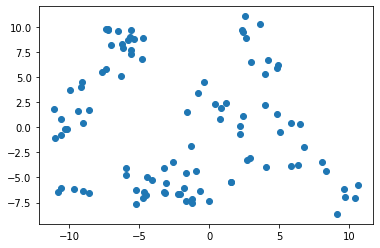

In [25]:
%matplotlib inline

#データ生成
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_blobs(centers=20, random_state=5)
plt.scatter(X[:,0], X[:,1])
plt.show()

[1 2 1 1 1 1 2 0 0 2 2 0 1 1 2 1 2 2 2 0 0 2 0 0 1 0 0 0 2 1 1 0 1 0 1 2 0
 2 0 1 2 0 1 1 2 2 0 1 2 2 0 1 1 2 1 0 0 2 2 1 0 2 1 2 0 1 2 2 2 0 0 1 1 2
 2 1 0 1 2 2 2 0 1 2 2 2 2 2 0 1 0 2 0 2 1 1 1 0 2 0]


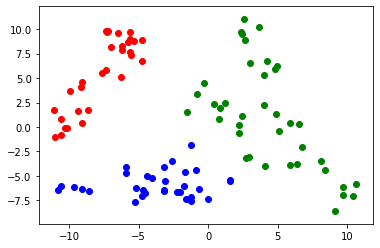

In [30]:
# 分類してみる
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
print(model.labels_)
#予測するものがないのでpredictはないです。

plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], c='red')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], c='blue')
plt.scatter(X[model.labels_==2,0], X[model.labels_==2,1], c='green')
plt.show()

<img src="https://drive.google.com/uc?export=view&id=1PBQm1C0n9XxgfQCE8xV4yASxWEO0hDYc" width="400">

### DBSCANの実装


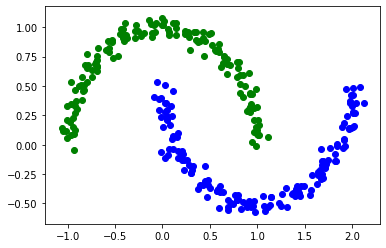

In [35]:
#データ生成
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_moons(n_samples=300, noise=.05)

from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.3)
model.fit(X)

plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], c='blue')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], c='green')
plt.show()

半径ε以内にあれば、自分の仲間にする

ただし、εを大きくしすぎるとみんな仲間になっちゃって、1つのグループになってしまうので

εの調整が重要

- 利点

    k-meansのようにクラスタ数を指定しなくて良い

    いろいろな形状のクラスタに対応できる

    外れ値を抽出できる

    →外れ値は仲間がいないので１人だけのグループになる

    外れ値に影響されずにクラスタリングできる

- 欠点
    決定的ではない(毎回結果が変わる可能性がある)
    
    ※ k-meansも同様

    適切なパラメータを決定するのが難しい


<img src="https://drive.google.com/uc?export=view&id=1mQjq54lK9alxvzvXfaw_eWaVoj7Uye4P" width="400">



### アソシエーション分析

**Support(支持度)**

このルールに沿った人がたくさんいる→良いルールだ。という考え方

※あまりにも支持度が高すぎると当たり前のルールなので意味がない

**Confidence(信頼度)**

りんごを買った人の中で、ばななを買う人は何%なのか

**Lift(リフト値)**

りんごを買うことによってどれだけバナナを買う確率があがったか

In [36]:
# アソシエーション分析を実装
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Milk', 'Onion', 'Nutmeg', 'Beans', 'Egg', 'Yogurt'], #お買い物リスト1
           ['Dill', 'Onion', 'Nutmeg', 'Beans', 'Egg', 'Yogurt'], #お買い物リスト2
           ['Milk', 'Apple', 'Beans', 'Egg'], #お買い物リスト3
           ['Milk', 'Unicorn', 'Corn', 'Beans', 'Yogurt'], #お買い物リスト4
           ['Corn', 'Onion', 'Onion', 'Cream', 'Egg']] #お買い物リスト5
te = TransactionEncoder()
#fit: ユニークラベルを学習, transform: one-hot形式に変換
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Beans,Corn,Cream,Dill,Egg,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,True,False,False,False,True,True,True,True,False,True
1,False,True,False,False,True,True,False,True,True,False,True
2,True,True,False,False,False,True,True,False,False,False,False
3,False,True,True,False,False,False,True,False,False,True,True
4,False,False,True,True,False,True,False,False,True,False,False


In [38]:
from mlxtend.frequent_patterns import  apriori

#アプリオリアルゴリズムの中に↑で作ったdataframeを入れて、最小支持度を入れてあげる
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(Beans)
1,0.8,(Egg)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.6,"(Beans, Egg)"
6,0.6,"(Beans, Milk)"
7,0.6,"(Beans, Yogurt)"
8,0.6,"(Egg, Onion)"


80%の人がBeans買ってますね。
80%の人がEgg買ってますね。

In [40]:
from mlxtend.frequent_patterns import association_rules

# aprioriアルゴリズムのfrequent_itemsetsをルールに渡してあげる
# confidenceの最小の閾値を設定
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beans),(Egg),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Egg),(Beans),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Beans),(Milk),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Milk),(Beans),0.6,0.8,0.6,1.00,1.2500,0.12,inf
4,(Beans),(Yogurt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
5,(Yogurt),(Beans),0.6,0.8,0.6,1.00,1.2500,0.12,inf
6,(Egg),(Onion),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
7,(Onion),(Egg),0.6,0.8,0.6,1.00,1.2500,0.12,inf
